# Logistic Regression on Imbalanced Dataset

In [1]:
# Generate and plot a synthetic imbalance classification dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from collections import Counter
# Imbalance dataset
X,y = make_classification(n_samples = 10000, n_features=2, n_clusters_per_class=1,n_redundant=0, weights=[0.99],random_state=42)

In [2]:
pd.DataFrame(X)

,0,1
0,0.204760,-0.357665
1,-1.381197,1.390041
2,0.556203,-0.691672
3,-2.532475,2.043372
4,0.230647,-0.344902
...,...,...
9995,-1.630707,1.549684
9996,-2.115273,2.051889
9997,-0.383088,0.101091
9998,-0.990915,0.766111


In [3]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [4]:
Counter(y)

Counter({np.int64(0): 9859, np.int64(1): 141})

<Axes: >

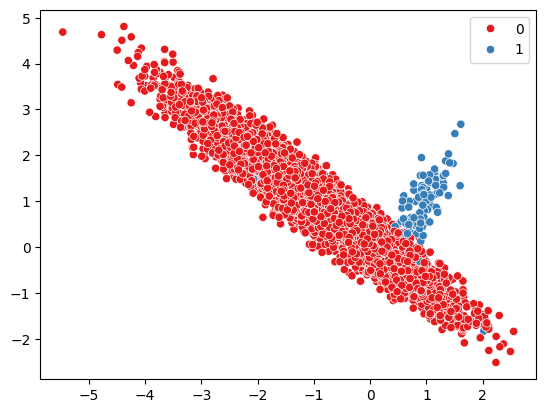

In [5]:
# visualize the dataset
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='Set1')

In [6]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hyperparameter Tuning

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1', 'l2','elasticnet']
c= [0.01,0.1,1,10,100]
solver = ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag']
class_weight = [{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [8]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [9]:
param = dict(penalty=penalty, C=c, solver=solver, class_weight=class_weight)

In [10]:
# use GridSearchCV to find the best hyperparameters
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold()
girdseatchcv = GridSearchCV(estimator= model, param_grid = param , scoring = "accuracy",cv=cv, n_jobs=-1)
girdseatchcv.fit(X_train, y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Asus\AppDa

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs',
                                    'sag']},
             scoring='accuracy')

In [11]:
girdseatchcv.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [12]:
girdseatchcv.best_score_

np.float64(0.9956249999999999)

In [13]:
# performance on the test set
from sklearn.metrics import classification_report, confusion_matrix
y_pred = girdseatchcv.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy: {girdseatchcv.score(X_test, y_test)}")

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1964
           1       0.96      0.61      0.75        36

    accuracy                           0.99      2000
   macro avg       0.97      0.81      0.87      2000
weighted avg       0.99      0.99      0.99      2000

[[1963    1]
 [  14   22]]
Accuracy: 0.9925


# Logistic Regression with ROC curve and ROC AUC Score

In [46]:
# ROC and AUC curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [47]:
#crate class dataset(2)
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.669356,-1.495778,-0.870766,1.141831,0.021606,1.730630,-1.251698,0.289305,0.357163,-0.196811,0.829274,0.154850,-0.219970,-0.739137,1.802012,1.634606,-0.938180,-1.267337,-1.276334,1.016643
1,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,0.543479,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363
2,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,-0.549925,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212
3,-0.585793,0.389279,0.698816,0.436236,-0.315082,0.459505,1.448820,0.505558,-1.440982,-1.134020,-0.241431,1.466783,0.678728,-1.190917,-1.442381,-0.929136,-0.221600,-0.346772,0.034246,-1.040199
4,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,-0.695695,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.519359,1.874906,0.078118,0.081083,0.201653,-2.756306,0.400236,-1.073689,-0.589452,-1.404240,-1.029972,0.046079,2.539382,-0.480648,-1.630771,-0.039894,1.673364,-0.134180,1.792044,0.248325
996,-0.410935,-0.546608,1.134924,0.334300,-0.618983,0.693425,-0.617285,1.087727,0.193022,1.461993,0.956549,-1.011037,-0.256734,0.517721,0.593266,-0.629825,-0.080137,-0.246737,-0.486387,2.211333
997,-0.200135,-1.461082,1.797017,-0.244096,0.544323,1.776031,-2.021994,-0.658113,0.206816,-0.114789,0.858663,0.542985,-0.420264,-0.748275,1.668697,-1.209965,-1.248582,-1.502802,-1.274737,1.601119
998,0.039356,0.248684,-0.475323,-1.136693,1.942577,-1.297109,-0.802722,0.451323,-1.454615,-0.679222,-0.451375,0.153528,0.637119,1.235484,0.780224,1.558384,0.263888,0.099126,0.542692,1.208275


In [48]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# create a dummy model with default output as 0
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [50]:
# create a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
# predict the probabilities of the positive class
y_pred = model.predict(X_test)
model_prob = model.predict_proba(X_test)

In [52]:
pd.DataFrame(y_pred)

,0
0,1
1,1
2,0
3,1
4,1
...,...
195,1
196,1
197,1
198,0


In [53]:
pd.DataFrame(model_prob)

,0,1
0,0.351112,0.648888
1,0.132095,0.867905
2,0.524593,0.475407
3,0.147365,0.852635
4,0.044500,0.955500
...,...,...
195,0.075977,0.924023
196,0.003137,0.996863
197,0.012284,0.987716
198,0.777420,0.222580


In [54]:
# focus on positive output
model_prob = model_prob[:, -1]
model_prob

array([0.64888799, 0.86790467, 0.47540675, 0.85263523, 0.95549976,
       0.05427555, 0.21776584, 0.82185232, 0.74542641, 0.38957666,
       0.95061676, 0.56872406, 0.00479634, 0.48603317, 0.71930823,
       0.20374525, 0.07604703, 0.94452452, 0.88694394, 0.47154486,
       0.99255899, 0.21310139, 0.04866819, 0.08948751, 0.97545926,
       0.00596722, 0.99947947, 0.93734068, 0.01483213, 0.96289128,
       0.86379686, 0.98419604, 0.55123316, 0.15747419, 0.29963554,
       0.22722364, 0.06013618, 0.45282654, 0.04716465, 0.34047867,
       0.02034041, 0.93918881, 0.07663384, 0.4788061 , 0.45191625,
       0.01143991, 0.98989525, 0.00539448, 0.82740933, 0.98773825,
       0.08141001, 0.08508543, 0.01382037, 0.99603785, 0.99602456,
       0.65829944, 0.01821615, 0.08597685, 0.81547051, 0.16762497,
       0.72032391, 0.10492042, 0.09956217, 0.99937402, 0.99900915,
       0.04930289, 0.9828376 , 0.71136103, 0.69320518, 0.26146545,
       0.12645122, 0.46879714, 0.43532668, 0.13793146, 0.12470

In [55]:
# calculate the scores
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
dummy_model_auc, model_auc

(np.float64(0.5), np.float64(0.9216159179981912))

In [56]:
# calculate the ROC curve
fpr_dummy, tpr_dummy, thresholds_dummy = roc_curve(y_test, dummy_model_prob)
fpr_model, tpr_model, thresholds_model = roc_curve(y_test, model_prob)


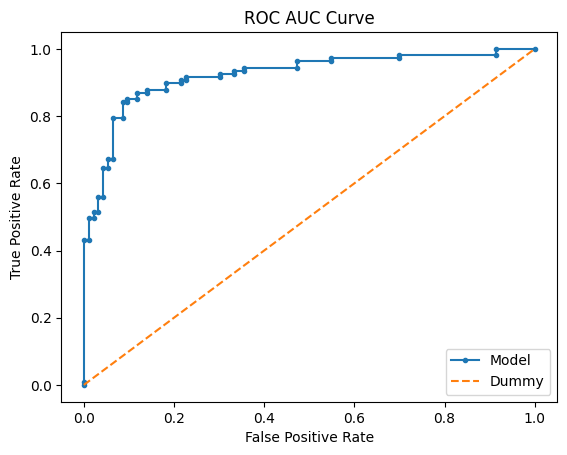

In [63]:
# plot roc auc curve for the model
plt.plot(fpr_model, tpr_model, label= "Model", marker = '.')
plt.plot(fpr_dummy, tpr_dummy, label= "Dummy", linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")    
plt.title("ROC AUC Curve")
plt.legend()
plt.show()

Logistic Regression model cover high area of auc curve in plot then dummy model. so Logistiv Regression is best model.

# How do we select the  threshold based on the Roc curve?

By default, Logistic Regression threshold is 
 -  > 0.5 = 1
 -  < 0.5 = 0


In [61]:
thresholds_model

array([       inf, 0.99982728, 0.93918881, 0.93734068, 0.89755377,
       0.89698957, 0.89076141, 0.89029953, 0.86790467, 0.86379686,
       0.75462   , 0.74542641, 0.72032391, 0.71930823, 0.54838445,
       0.50959859, 0.47540675, 0.47415768, 0.47154486, 0.45282654,
       0.44759667, 0.42968574, 0.42350886, 0.37052246, 0.34488493,
       0.29963554, 0.2901814 , 0.2897913 , 0.26458996, 0.21776584,
       0.21477485, 0.20374525, 0.20220372, 0.17080913, 0.16762497,
       0.11042754, 0.10687285, 0.08746126, 0.08597685, 0.05417559,
       0.0539411 , 0.0130019 , 0.00807431, 0.00281658])

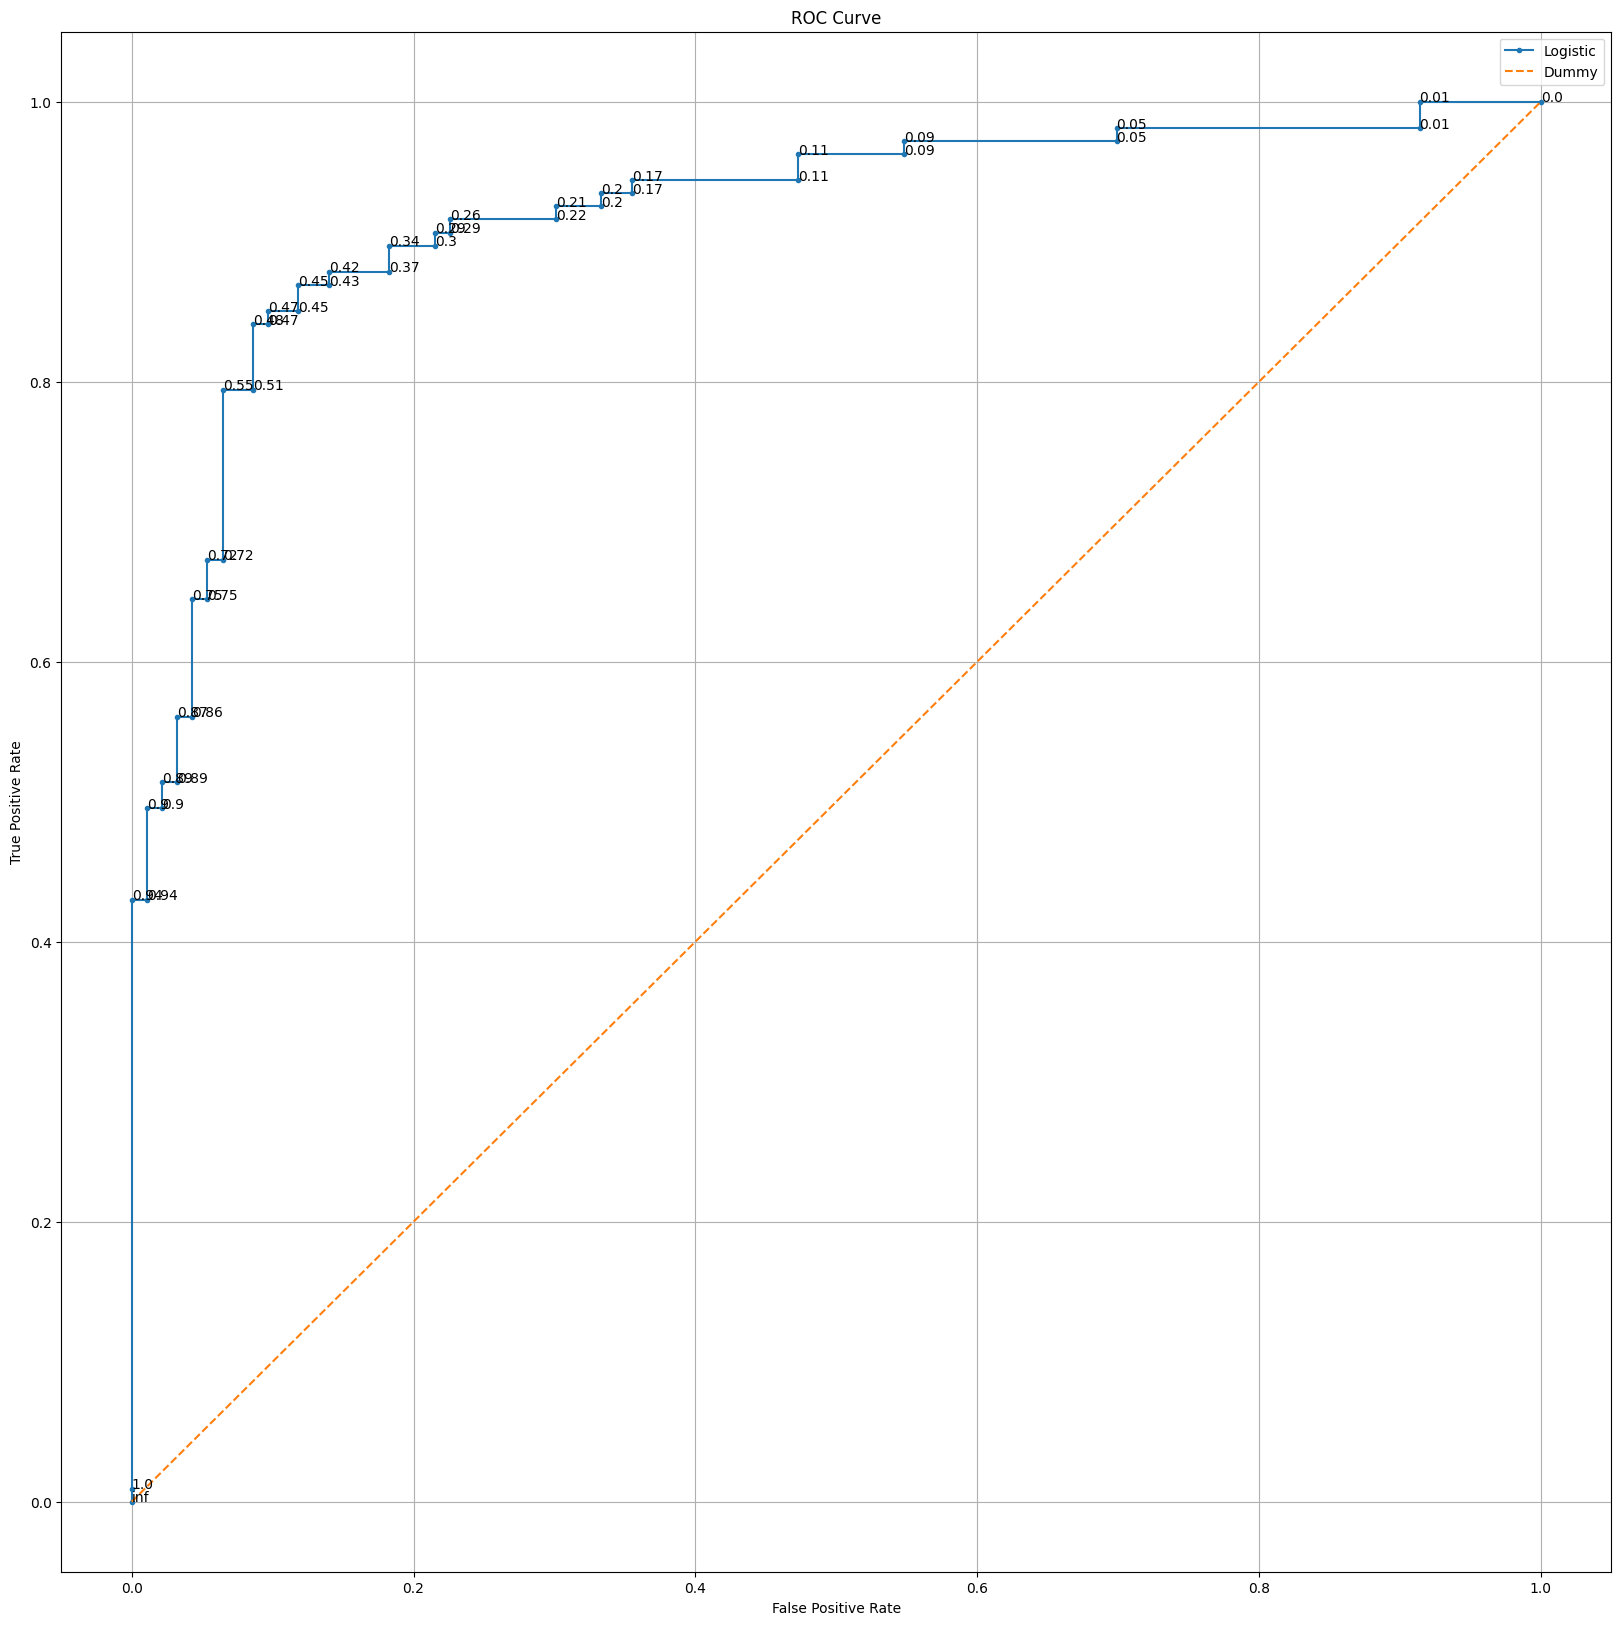

In [76]:
# plot the rov curve for the model
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)  # First create the subplot (axis)

# Now plot on that axis
ax.plot(fpr_model, tpr_model, label="Logistic", marker='.')
ax.plot(fpr_dummy, tpr_dummy, label="Dummy", linestyle='--')

# Annotate thresholds
for i in zip(fpr_model, tpr_model, thresholds_model):
    ax.annotate("%s"%np.round(i[2],2), xy=(i[0], i[1]))

# Add labels, title, and legend
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve")
ax.legend()
plt.grid(True)
plt.show()
